In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
x , y_true = make_blobs(n_samples=500 , centers=3 , cluster_std=0.50 ,random_state=42)

In [7]:
df = pd.DataFrame(x , columns=['f1', 'f2'])

In [8]:
df

,f1,f2
0,-6.304991,-7.231698
1,3.291436,1.946022
2,5.734780,1.569021
3,-2.705252,8.282529
4,5.240486,1.769132
...,...,...
495,-6.179949,-6.417793
496,-2.547748,9.184862
497,4.471986,2.807680
498,-7.140989,-6.355605


In [14]:
scaler = StandardScaler()


In [17]:
x_scaled = scaler.fit_transform(df)

In [18]:
x_scaled

array([[-9.95466457e-01, -1.32936348e+00],
       [ 1.02176908e+00,  8.36562095e-02],
       [ 1.53537716e+00,  2.56122905e-02],
       [-2.38776304e-01,  1.05923710e+00],
       [ 1.43147301e+00,  5.64218409e-02],
       [ 1.39249243e+00,  2.19337130e-02],
       [-8.47185289e-01, -1.28262706e+00],
       [ 1.33364720e+00,  8.39685026e-02],
       [ 1.19301063e+00,  7.68753696e-02],
       [-1.18192969e+00, -1.27322376e+00],
       [ 1.23726419e+00,  4.57726057e-03],
       [-7.57919460e-02,  1.10872299e+00],
       [ 2.66248569e-02,  1.02162629e+00],
       [-1.37561794e-01,  1.25931686e+00],
       [ 1.33567760e+00,  2.47602260e-01],
       [ 1.41646535e+00, -4.75536006e-02],
       [-2.05132887e-01,  1.24915285e+00],
       [-1.23426107e+00, -1.24579400e+00],
       [-1.10761075e+00, -1.19321056e+00],
       [-3.13844028e-01,  1.07981476e+00],
       [ 1.15822693e+00,  1.31173803e-01],
       [-1.75612082e-01,  1.02104259e+00],
       [ 1.36581939e+00,  1.11796222e-01],
       [-9.

In [19]:
#here we don't need y values as we are not going to predict anything or using just x_scaled

In [20]:
#using elbow method --> capture value of WCSS called inertia

In [32]:
wcss = [] #wcss or inertia both are same

In [33]:
k_range = range(1,11)

In [34]:
for k in k_range:
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [35]:
wcss

[999.9999999999998,
 295.0590160543596,
 8.05907830917352,
 6.788629556734228,
 5.747072050414491,
 4.995881804456532,
 4.408690155080967,
 3.9708734027932513,
 3.5224251135406397,
 3.314770882629785]

In [36]:
#visalize iPendingDeprecationWarning

AttributeError: Line2D.set() got an unexpected keyword argument 'makers'

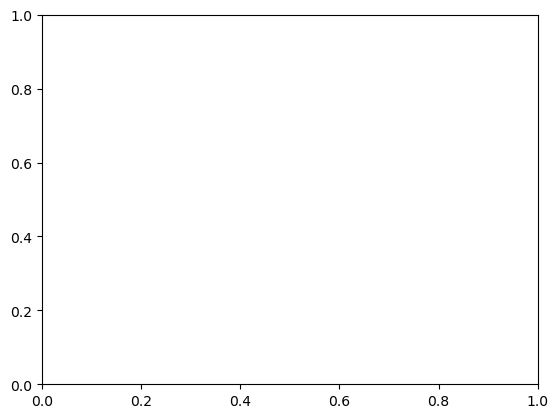

In [37]:
plt.plot(k_range , wcss , makers='o')

In [38]:
k_means_final = KMeans(n_clusters=3 , random_state=42)

In [40]:
cluster_labels = k_means_final.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [41]:
df['cluster'] = cluster_labels

<Axes: xlabel='f1', ylabel='f2'>

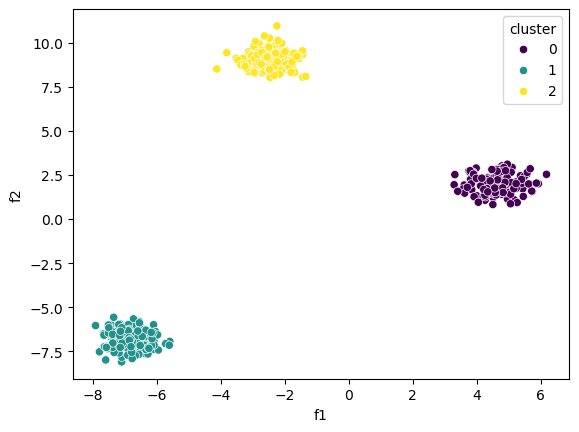

In [42]:
sns.scatterplot(x=df['f1'] , y=df['f2'] , hue=df['cluster'] , palette='viridis')

In [1]:
#DBSCAN 

In [2]:
from sklearn.datasets import make_moons

In [4]:
x , y_true = make_moons(n_samples=500 ,  noise=0.05 ,random_state=42)

In [6]:
from sklearn.cluster import DBSCAN , KMeans

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(x , columns=['f1' , 'f2'])

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
x_scaled = StandardScaler().fit_transform(x)

In [12]:
x_scaled

array([[ 3.75124610e-01, -1.40367864e+00],
       [ 2.26814579e-01,  1.13562771e+00],
       [ 5.95441542e-01, -1.49371022e+00],
       [-9.44918355e-01,  1.40974769e+00],
       [-2.43115122e-01,  1.61806199e+00],
       [ 8.63307743e-01, -1.47536691e+00],
       [ 6.31994868e-01, -1.39355455e+00],
       [-5.44373389e-01,  1.60968258e+00],
       [ 1.33469407e-01,  9.27161489e-01],
       [ 1.47624835e+00, -7.91720052e-01],
       [ 5.68973828e-01, -3.20332517e-01],
       [-1.39415493e+00,  6.49875138e-01],
       [ 1.10479310e+00, -1.45063573e+00],
       [-8.90656986e-02,  1.16396681e+00],
       [ 6.31497948e-01, -1.51069392e+00],
       [ 7.95512152e-01, -1.49803307e+00],
       [ 1.71390580e+00,  3.47204752e-01],
       [ 4.91521597e-01,  2.86970964e-01],
       [-1.07565622e-01, -1.17427347e+00],
       [ 1.13463298e+00, -1.27892474e+00],
       [ 1.69198729e+00,  2.16783084e-01],
       [ 1.77473503e+00,  3.19948276e-01],
       [-5.87288774e-01, -2.06252585e-01],
       [ 3.

In [13]:
kmeans = KMeans(n_clusters=2 , random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
df['clusters'] = kmeans_labels

<Axes: xlabel='f1', ylabel='f2'>

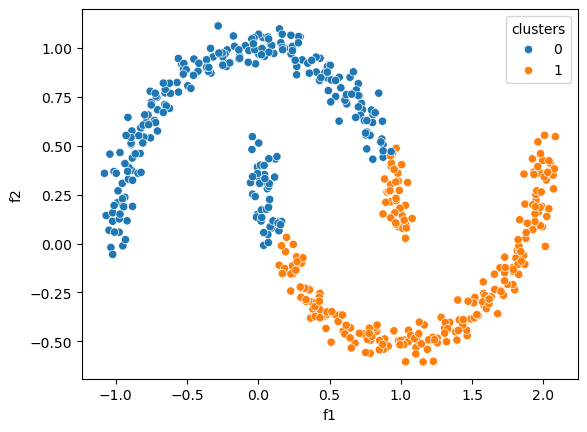

In [18]:
import seaborn as sns
sns.scatterplot(x=df['f1'] , y=df['f2'] , hue=df['clusters'] , palette='tab10')

In [19]:
#Kmeans faces problems to show clusters in non-centroid datas

In [20]:
#that is resolved by DBSCAn

In [22]:
dbscan = DBSCAN(eps=0.3 , min_samples=5) #min_samples is that any cluster will atleast have 5 datapoints if not associated to another cluster
dbscan_labels = dbscan.fit_predict(x_scaled)

In [23]:
df['dbcluster'] = dbscan_labels

<Axes: xlabel='f1', ylabel='f2'>

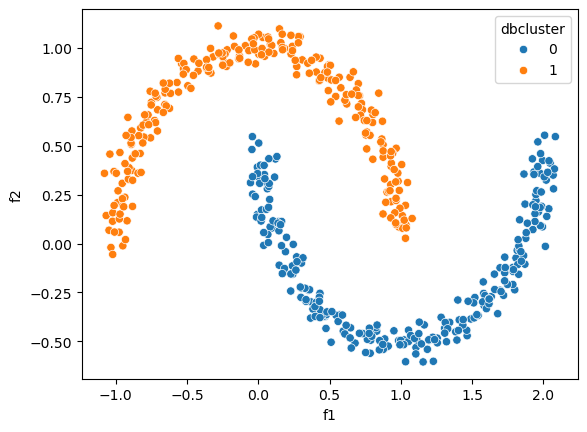

In [24]:
sns.scatterplot(x=df['f1'] , y=df['f2'] , hue=df['dbcluster'])